In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FoodX.csv") #reads and formats csv file

In [4]:
#want to see a summary of data
summaryOfDataFrame = data.describe()
print(summaryOfDataFrame)

              Time
count  5000.000000
mean     12.528200
std       1.357193
min       8.000000
25%      12.000000
50%      13.000000
75%      13.000000
max      17.000000


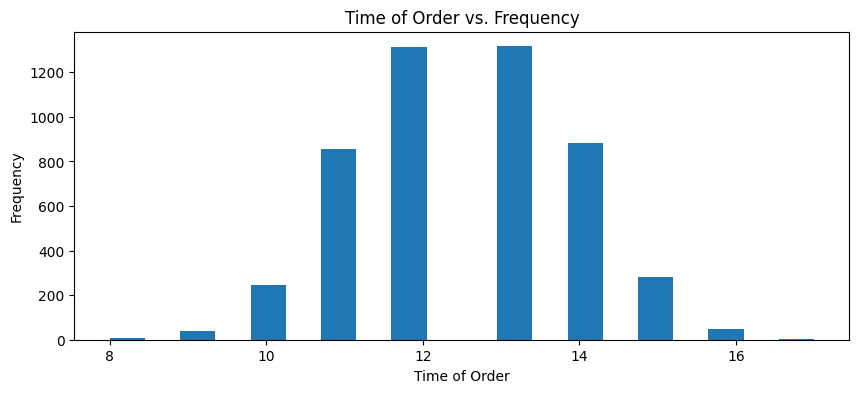

In [21]:
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns
#above gets numerical data

plt.figure(figsize=(10, 4 * len(numerical_cols)))
for column in numerical_cols:
  plt.hist(data[column], bins=20, label=column)
plt.xlabel("Time of Order")
plt.ylabel("Frequency")
plt.title("Time of Order vs. Frequency")
plt.show()
#sets according size for figure


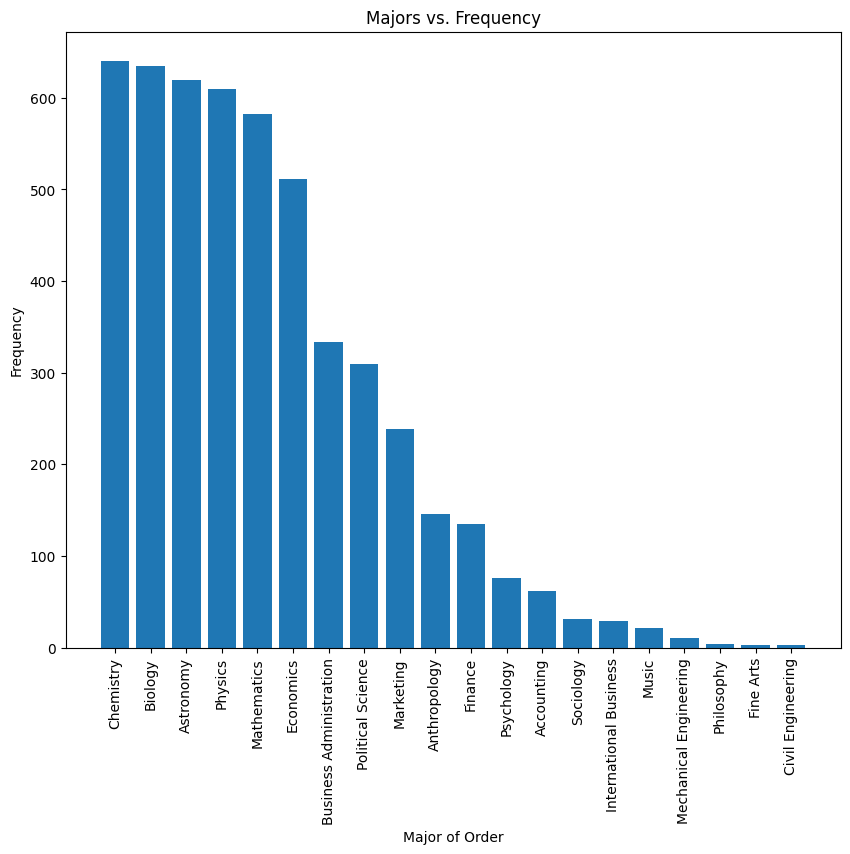

In [7]:
count = data["Major"].value_counts()
#above gets the data from particular column

plt.figure(figsize=(10, 8))
plt.bar(count.index, count.values)
plt.xlabel("Major of Order")
plt.ylabel("Frequency")
plt.title("Majors vs. Frequency")
plt.xticks(rotation=90) #rotates axis to be more readible
plt.show()


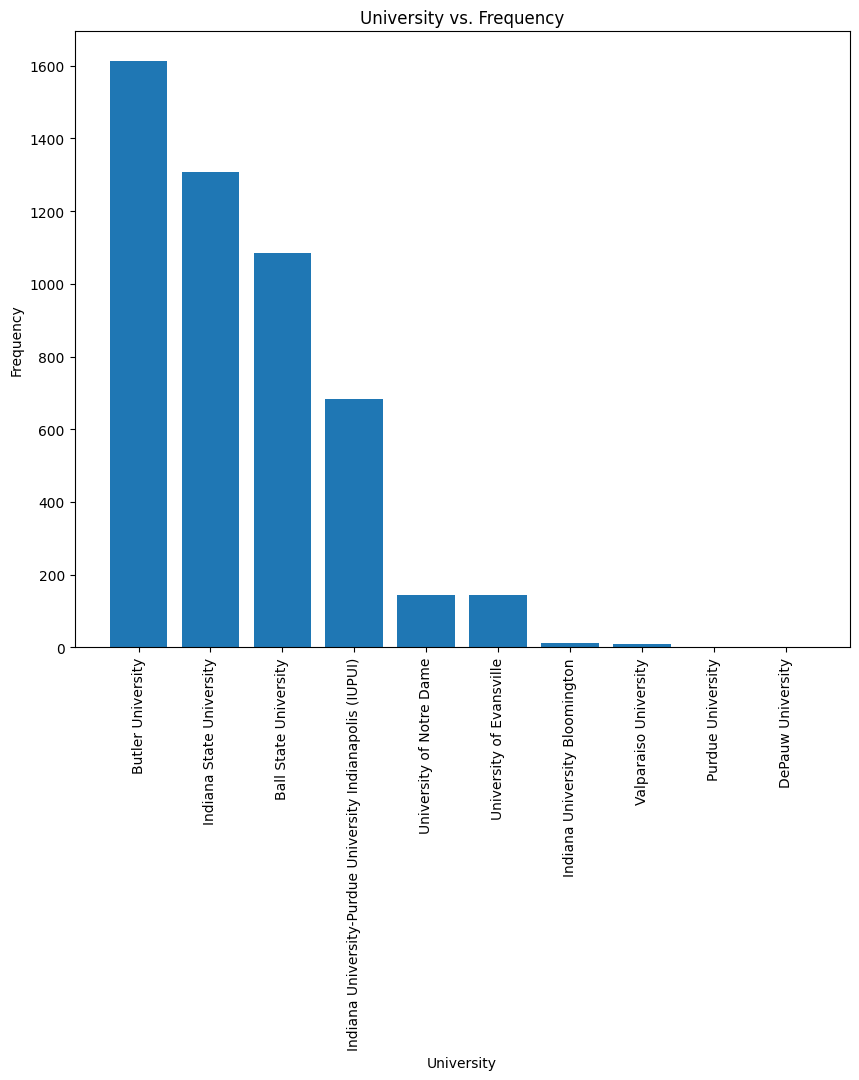

In [9]:
count = data["University"].value_counts()
#above gets the data from particular column

plt.figure(figsize=(10, 8))
plt.bar(count.index, count.values)
plt.xlabel("University")
plt.ylabel("Frequency")
plt.title("University vs. Frequency")
plt.xticks(rotation=90) #rotates axis to be more readible
plt.show()

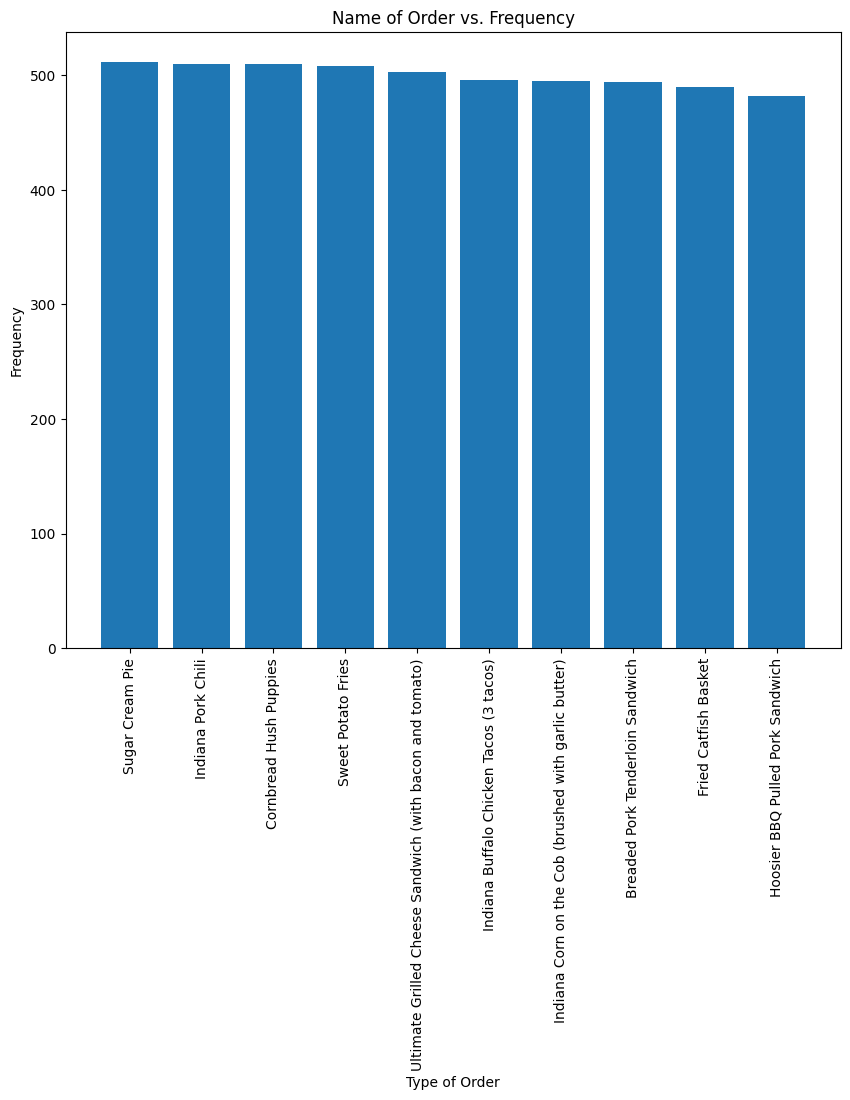

In [10]:
count = data["Order"].value_counts()
#above gets the data from particular column

plt.figure(figsize=(10, 8))
plt.bar(count.index, count.values)
plt.xlabel("Type of Order")
plt.ylabel("Frequency")
plt.title("Name of Order vs. Frequency")
plt.xticks(rotation=90) #rotates axis to be more readible
plt.show()

In [18]:
#starting the data analysis using sklearn to determine effective accuracy

#first will need to import pickle and scklearn libraries for analysis
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [27]:
#values I will train and test
x = pd.get_dummies(data[['Year', 'Major', 'University', 'Time']]) #will help convert
# categorical data into indicators which we can then use to train_test_split
y = data["Order"] #go within each column
ros = RandomOverSampler(random_state=42)
x_val, y_val = ros.fit_resample(x, y)

x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_val, y_val, test_size=0.4, random_state = 40)


#using this classifier from sklearn library
temp = DecisionTreeClassifier()
#using fit function train
temp.fit(x_val_train, y_val_train)
predict = temp.predict(x_val_test) #predicts the subsequent y values
accuracy = accuracy_score(y_val_test, predict) #compare to determine accurate decimal from 0-1
print("Accuracy: " + str(accuracy)) #this determines accuracy of our actual model that we employed

Accuracy: 0.638671875


In [33]:
#finally, will go ahead and just pickle the file with the simple with open command
# I make sure I write with binary as I need to specify that as a second paramter
with open("prediction_results.pkl", "wb") as finale_file:
    pickle.dump(temp, finale_file)